In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [4]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [6]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [7]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [8]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [10]:
softplus_train = []
softplus_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        softplus_train.append(modelhistory.history['accuracy'])
        softplus_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 4s 14ms/step - loss: 0.6580 - accuracy: 0.6089 - val_loss: 0.5349 - val_accuracy: 0.7546
Epoch 2/20
242/242 [==============================] - 1s 5ms/step - loss: 0.5556 - accuracy: 0.7232 - val_loss: 0.4930 - val_accuracy: 0.7639
Epoch 3/20
242/242 [==============================] - 1s 5ms/step - loss: 0.4923 - accuracy: 0.7723 - val_loss: 0.5034 - val_accuracy: 0.7558
Epoch 4/20
242/242 [==============================] - 1s 5ms/step - loss: 0.4917 - accuracy: 0.7706 - val_loss: 0.4820 - val_accuracy: 0.7763
Epoch 5/20
242/242 [==============================] - 1s 5ms/step - loss: 0.7825 - accuracy: 0.6815 - val_loss: 0.6011 - val_accuracy: 0.6877
Epoch 6/20
242/242 [==============================] - 1s 5ms/step - loss: 0.5991 - accuracy: 0.6970 - val_loss: 0.5036 - val_accuracy: 0.7633
Epoch 7/20
242/242 [==============================] - 1s 5ms/step - loss: 0.5334 - accuracy: 0.7532 - val_loss: 0.4774 - val_accuracy: 0.7739
Epoch

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softsign'))

In [12]:
softsign_train = []
softsign_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        softsign_train.append(modelhistory.history['accuracy'])
        softsign_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 1s 4ms/step - loss: 1.1194 - accuracy: 0.5450 - val_loss: 0.6693 - val_accuracy: 0.5758
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.5978 - val_loss: 0.6250 - val_accuracy: 0.6964
Epoch 3/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.6846 - val_loss: 0.5694 - val_accuracy: 0.7299
Epoch 4/20
242/242 [==============================] - 1s 4ms/step - loss: 0.5940 - accuracy: 0.6957 - val_loss: 0.5460 - val_accuracy: 0.7413
Epoch 5/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6002 - accuracy: 0.7074 - val_loss: 0.6306 - val_accuracy: 0.5629
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6018 - accuracy: 0.6428 - val_loss: 0.5340 - val_accuracy: 0.7609
Epoch 7/20
242/242 [==============================] - 1s 4ms/step - loss: 0.5298 - accuracy: 0.7660 - val_loss: 0.5034 - val_accuracy: 0.7778
Epoch 

In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='selu'))

In [14]:
selu_train = []
selu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        selu_train.append(modelhistory.history['accuracy'])
        selu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 2s 5ms/step - loss: 0.7854 - accuracy: 0.6120 - val_loss: 0.5009 - val_accuracy: 0.7766
Epoch 2/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4962 - accuracy: 0.7768 - val_loss: 0.4371 - val_accuracy: 0.7989
Epoch 3/20
242/242 [==============================] - 1s 4ms/step - loss: 0.8239 - accuracy: 0.7845 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 4/20
242/242 [==============================] - 1s 4ms/step - loss: 6.8991 - accuracy: 0.5476 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 5/20
242/242 [==============================] - 1s 4ms/step - loss: 6.8336 - accuracy: 0.5519 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 6.9811 - accuracy: 0.5422 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 7/20
242/242 [==============================] - 1s 5ms/step - loss: 6.8767 - accuracy: 0.5490 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='elu'))

In [16]:
elu_train = []
elu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        elu_train.append(modelhistory.history['accuracy'])
        elu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6262 - accuracy: 0.6687 - val_loss: 0.4668 - val_accuracy: 0.7784
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6023 - accuracy: 0.7306 - val_loss: 0.6626 - val_accuracy: 0.7033
Epoch 3/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6077 - accuracy: 0.6815 - val_loss: 0.6431 - val_accuracy: 0.6515
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 0.5708 - accuracy: 0.7202 - val_loss: 0.4784 - val_accuracy: 0.7832
Epoch 5/20
242/242 [==============================] - 1s 3ms/step - loss: 1.5642 - accuracy: 0.7388 - val_loss: 8.6821 - val_accuracy: 0.4371
Epoch 6/20
242/242 [==============================] - 1s 3ms/step - loss: 8.5448 - accuracy: 0.4460 - val_loss: 8.6821 - val_accuracy: 0.4371
Epoch 7/20
242/242 [==============================] - 1s 3ms/step - loss: 8.7005 - accuracy: 0.4359 - val_loss: 8.6821 - val_accuracy: 0.4371
Epoch 

In [17]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='exponential'))

In [18]:
exp_train = []
exp_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        exp_train.append(modelhistory.history['accuracy'])
        exp_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 1s 4ms/step - loss: 0.7428 - accuracy: 0.6456 - val_loss: 0.4976 - val_accuracy: 0.7404
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7620 - val_loss: 0.4866 - val_accuracy: 0.7718
Epoch 3/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.6761 - val_loss: 0.4811 - val_accuracy: 0.7760
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 0.5421 - accuracy: 0.7337 - val_loss: 0.5880 - val_accuracy: 0.7211
Epoch 5/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4950 - accuracy: 0.7757 - val_loss: 0.4524 - val_accuracy: 0.7899
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4474 - accuracy: 0.7932 - val_loss: 0.4564 - val_accuracy: 0.7956
Epoch 7/20
242/242 [==============================] - 1s 3ms/step - loss: 0.4405 - accuracy: 0.8008 - val_loss: 0.4542 - val_accuracy: 0.8007
Epoch 

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='tanh'))

In [20]:
tanh_train = []
tanh_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        tanh_train.append(modelhistory.history['accuracy'])
        tanh_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 2s 4ms/step - loss: 0.6604 - accuracy: 0.6319 - val_loss: 0.4860 - val_accuracy: 0.7760
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 0.4991 - accuracy: 0.7691 - val_loss: 0.4594 - val_accuracy: 0.7869
Epoch 3/20
242/242 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.7637 - val_loss: 0.4699 - val_accuracy: 0.7881
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.7870 - val_loss: 0.4641 - val_accuracy: 0.7974
Epoch 5/20
242/242 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.7924 - val_loss: 0.4179 - val_accuracy: 0.8040
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8093 - val_loss: 0.4052 - val_accuracy: 0.8146
Epoch 7/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4042 - accuracy: 0.8185 - val_loss: 0.4147 - val_accuracy: 0.8206
Epoch 

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [22]:
sigmoid_train = []
sigmoid_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        sigmoid_train.append(modelhistory.history['accuracy'])
        sigmoid_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136 - val_loss: 0.6676 - val_accuracy: 0.5632
Epoch 2/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6648 - accuracy: 0.5954 - val_loss: 0.6240 - val_accuracy: 0.7443
Epoch 3/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6092 - accuracy: 0.7061 - val_loss: 0.5283 - val_accuracy: 0.7673
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.7516 - val_loss: 0.4954 - val_accuracy: 0.7486
Epoch 5/20
242/242 [==============================] - 1s 5ms/step - loss: 0.4684 - accuracy: 0.7820 - val_loss: 0.4637 - val_accuracy: 0.7805
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7780 - val_loss: 0.4455 - val_accuracy: 0.7947
Epoch 7/20
242/242 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.8035 - val_loss: 0.4350 - val_accuracy: 0.7989
Epoch 

In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='relu'))

In [24]:
relu_train = []
relu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        relu_train.append(modelhistory.history['accuracy'])
        relu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 1s 4ms/step - loss: 6.6968 - accuracy: 0.5575 - val_loss: 6.6622 - val_accuracy: 0.5629
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 3.9234 - accuracy: 0.5838 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 3/20
242/242 [==============================] - 1s 3ms/step - loss: 6.9802 - accuracy: 0.5423 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 6.8957 - accuracy: 0.5478 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 5/20
242/242 [==============================] - 1s 4ms/step - loss: 6.8333 - accuracy: 0.5519 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 6/20
242/242 [==============================] - 1s 3ms/step - loss: 6.8500 - accuracy: 0.5508 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 7/20
242/242 [==============================] - 1s 4ms/step - loss: 6.9373 - accuracy: 0.5451 - val_loss: 6.6661 - val_accuracy: 0.5629
Epoch 

In [25]:
softplus_train = []
softplus_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))
        softplus_train.append(modelhistory.history['accuracy'])
        softplus_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 2s 4ms/step - loss: 0.7435 - accuracy: 0.4945 - val_loss: 0.6871 - val_accuracy: 0.5629
Epoch 2/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.5435 - val_loss: 0.6858 - val_accuracy: 0.5629
Epoch 3/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.5554 - val_loss: 0.6855 - val_accuracy: 0.5629
Epoch 4/20
242/242 [==============================] - 1s 3ms/step - loss: 0.6872 - accuracy: 0.5561 - val_loss: 0.6852 - val_accuracy: 0.5629
Epoch 5/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6888 - accuracy: 0.5493 - val_loss: 0.6852 - val_accuracy: 0.5629
Epoch 6/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6861 - accuracy: 0.5607 - val_loss: 0.6855 - val_accuracy: 0.5629
Epoch 7/20
242/242 [==============================] - 1s 4ms/step - loss: 0.6893 - accuracy: 0.5460 - val_loss: 0.6852 - val_accuracy: 0.5629
Epoch 

In [28]:
softlus = np.array(softplus_train)
softlusv = np.array(softplus_val)
softsign = np.array(softsign_train)
softsignv = np.array(softsign_val)
selu = np.array(selu_train)
seluv = np.array(selu_val)
elu = np.array(elu_train)
eluv = np.array(elu_val)
exp = np.array(exp_train)
expv = np.array(exp_val)
tanh = np.array(tanh_train)
tanhv = np.array(tanh_val)
sigmoid = np.array(sigmoid_train)
sigmoidv = np.array(sigmoid_val)
relu = np.array(relu_train)
reluv = np.array(relu_val)
binary = ['b_cros', 'hinge', 'sq_hinge', 'huber']

In [29]:
sigmoid_comb = []

for opt in optimizers:
    for loss in binary:
        sigmoid_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(sigmoid.shape[0]):
  best_accuracy_train.append(np.max(sigmoid[i]))
  last_accuracy_train.append(sigmoid[i,-1])
  best_accuracy_val.append(np.max(sigmoidv[i]))
  last_accuracy_val.append(sigmoidv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

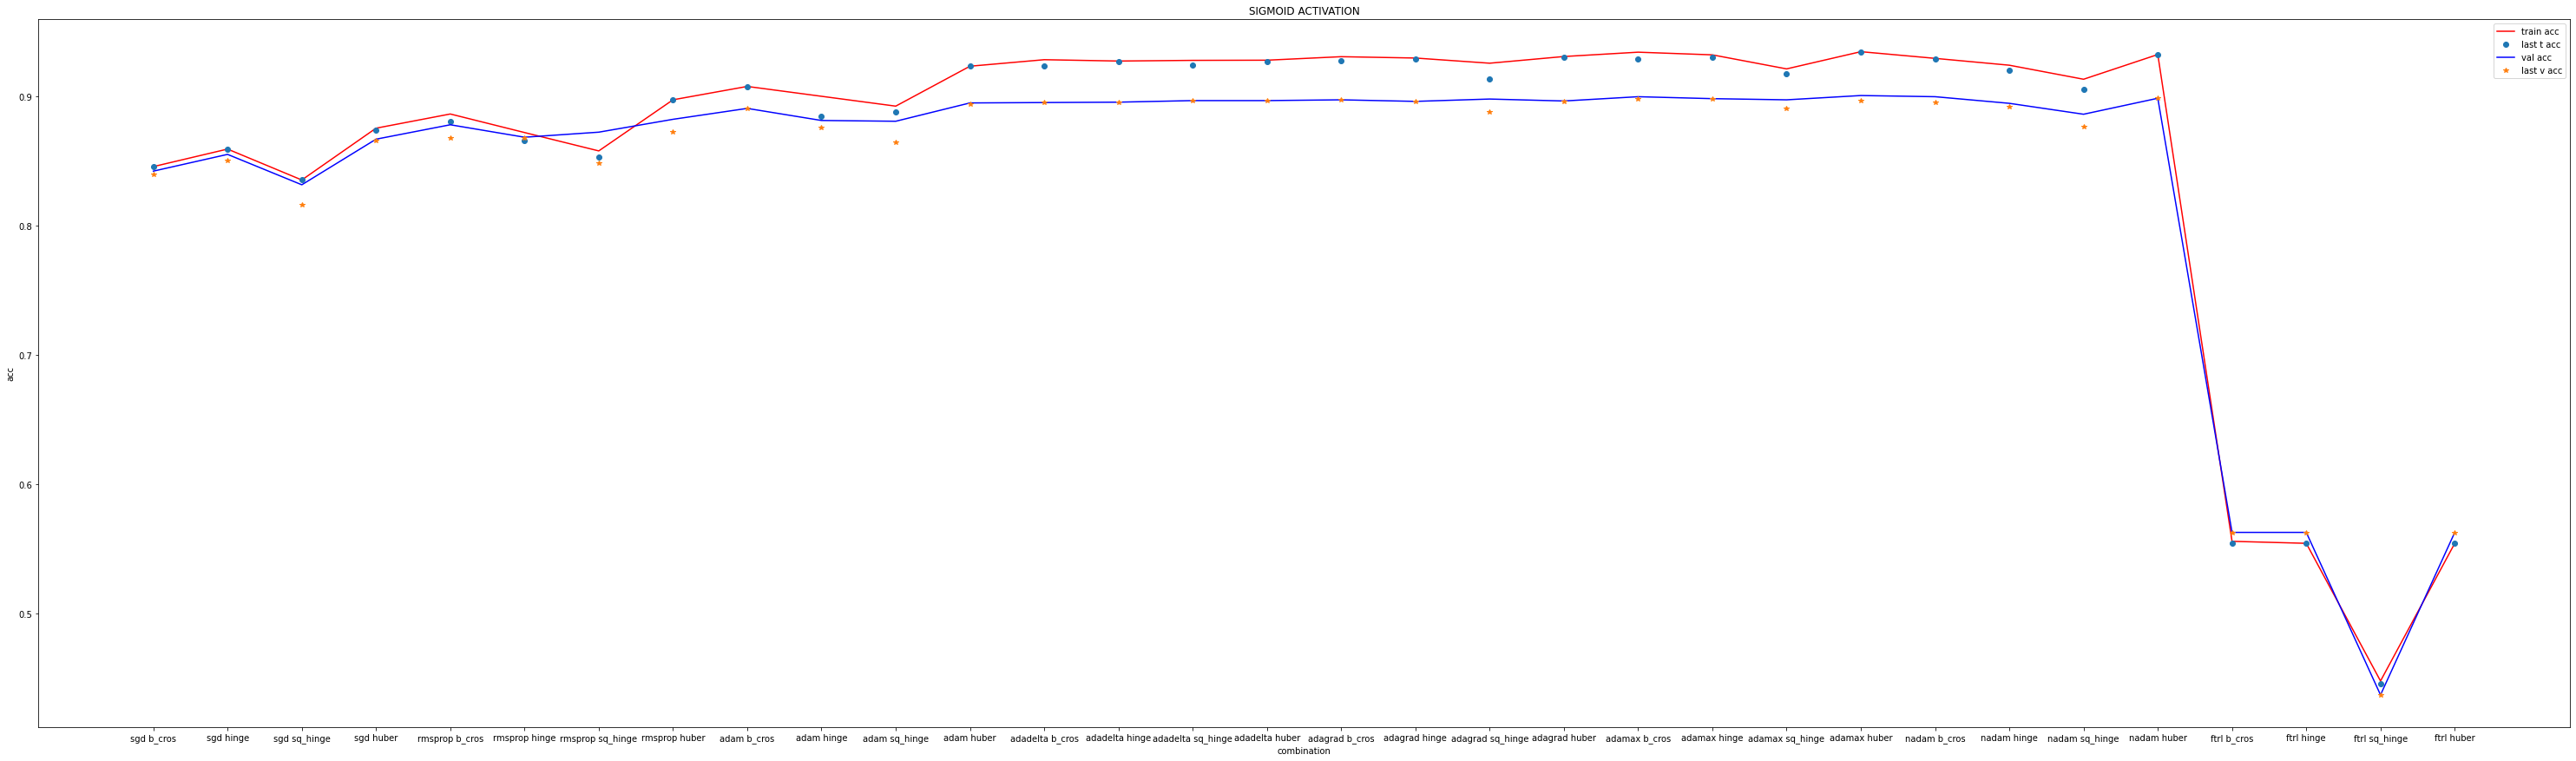

In [30]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(sigmoid_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(sigmoid_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(sigmoid_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(sigmoid_comb, last_accuracy_val, '*', label='last v acc')
plt.title('SIGMOID ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [31]:
tanh_comb = []

for opt in optimizers:
    for loss in binary:
        tanh_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(tanh.shape[0]):
  best_accuracy_train.append(np.max(tanh[i]))
  last_accuracy_train.append(tanh[i,-1])
  best_accuracy_val.append(np.max(tanhv[i]))
  last_accuracy_val.append(tanhv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

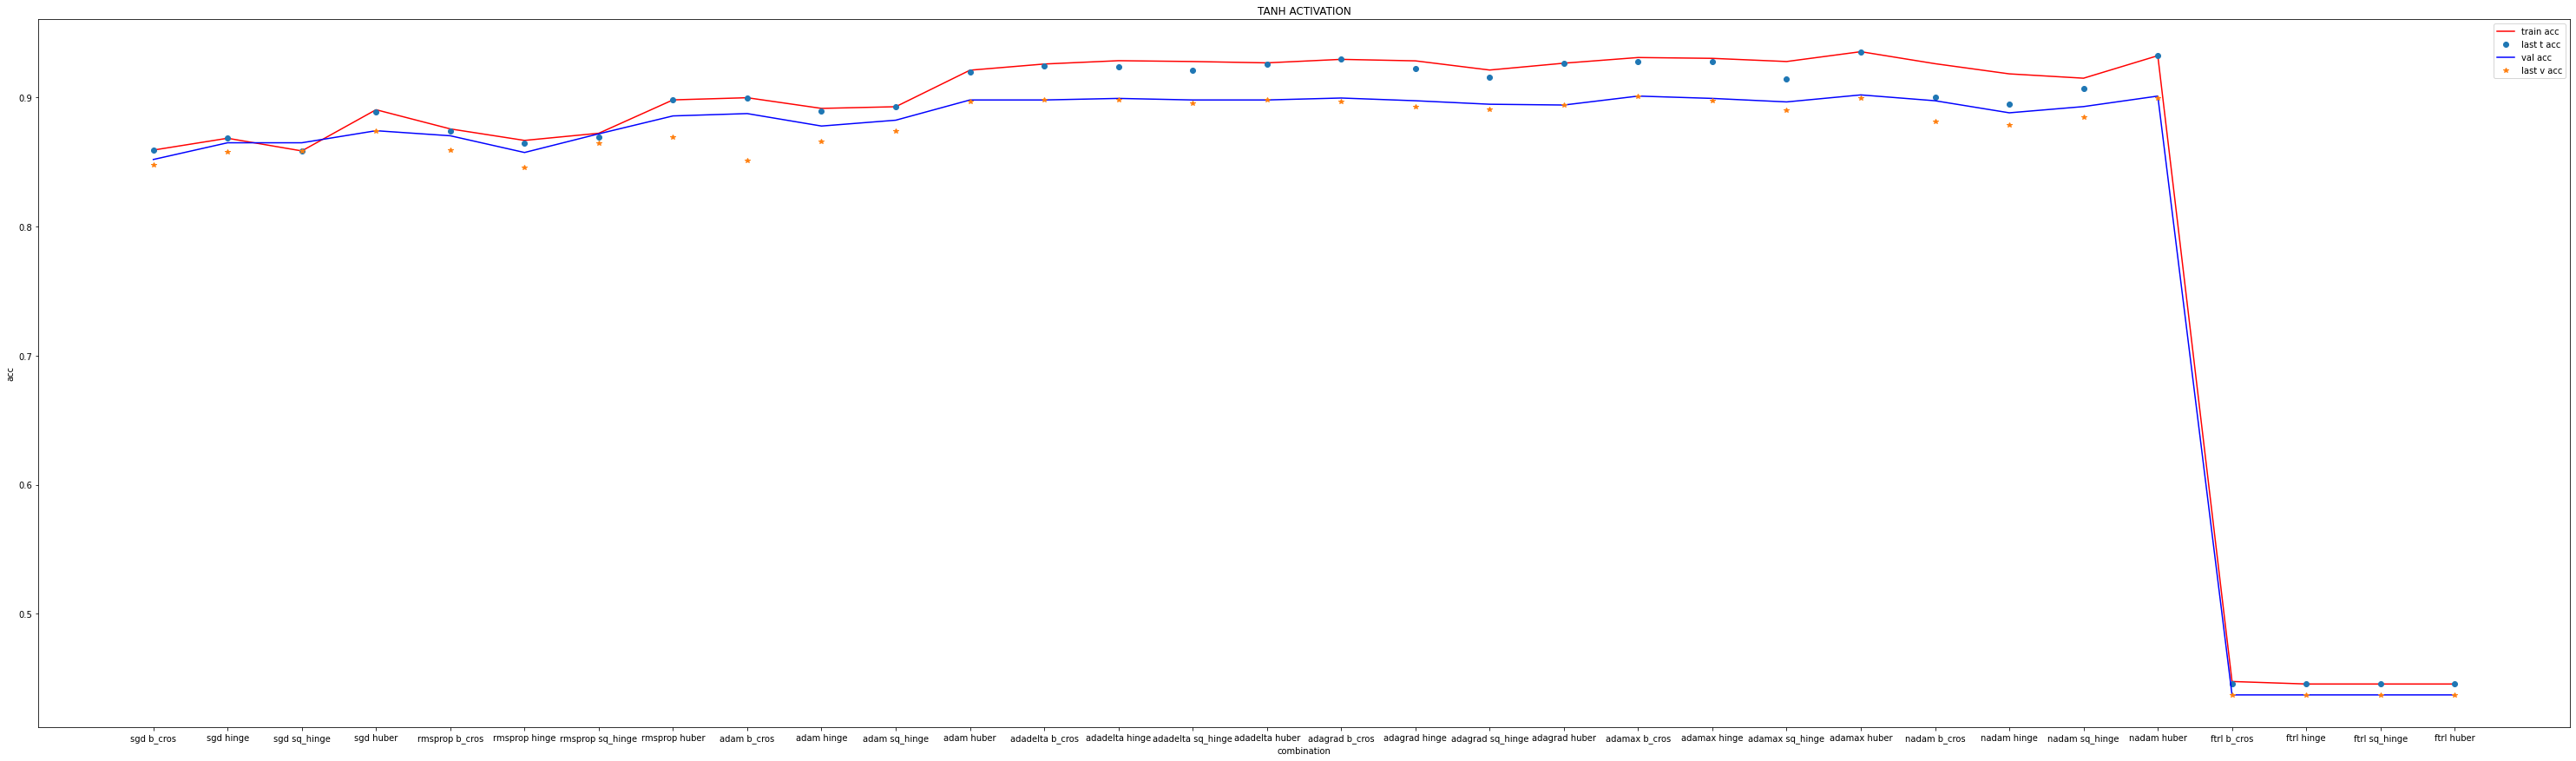

In [32]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(tanh_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(tanh_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(tanh_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(tanh_comb, last_accuracy_val, '*', label='last v acc')
plt.title('TANH ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [35]:
softplus_comb = []

for opt in optimizers:
    for loss in binary:
        softplus_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softlus.shape[0]):
  best_accuracy_train.append(np.max(softlus[i]))
  last_accuracy_train.append(softlus[i,-1])
  best_accuracy_val.append(np.max(softlusv[i]))
  last_accuracy_val.append(softlusv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

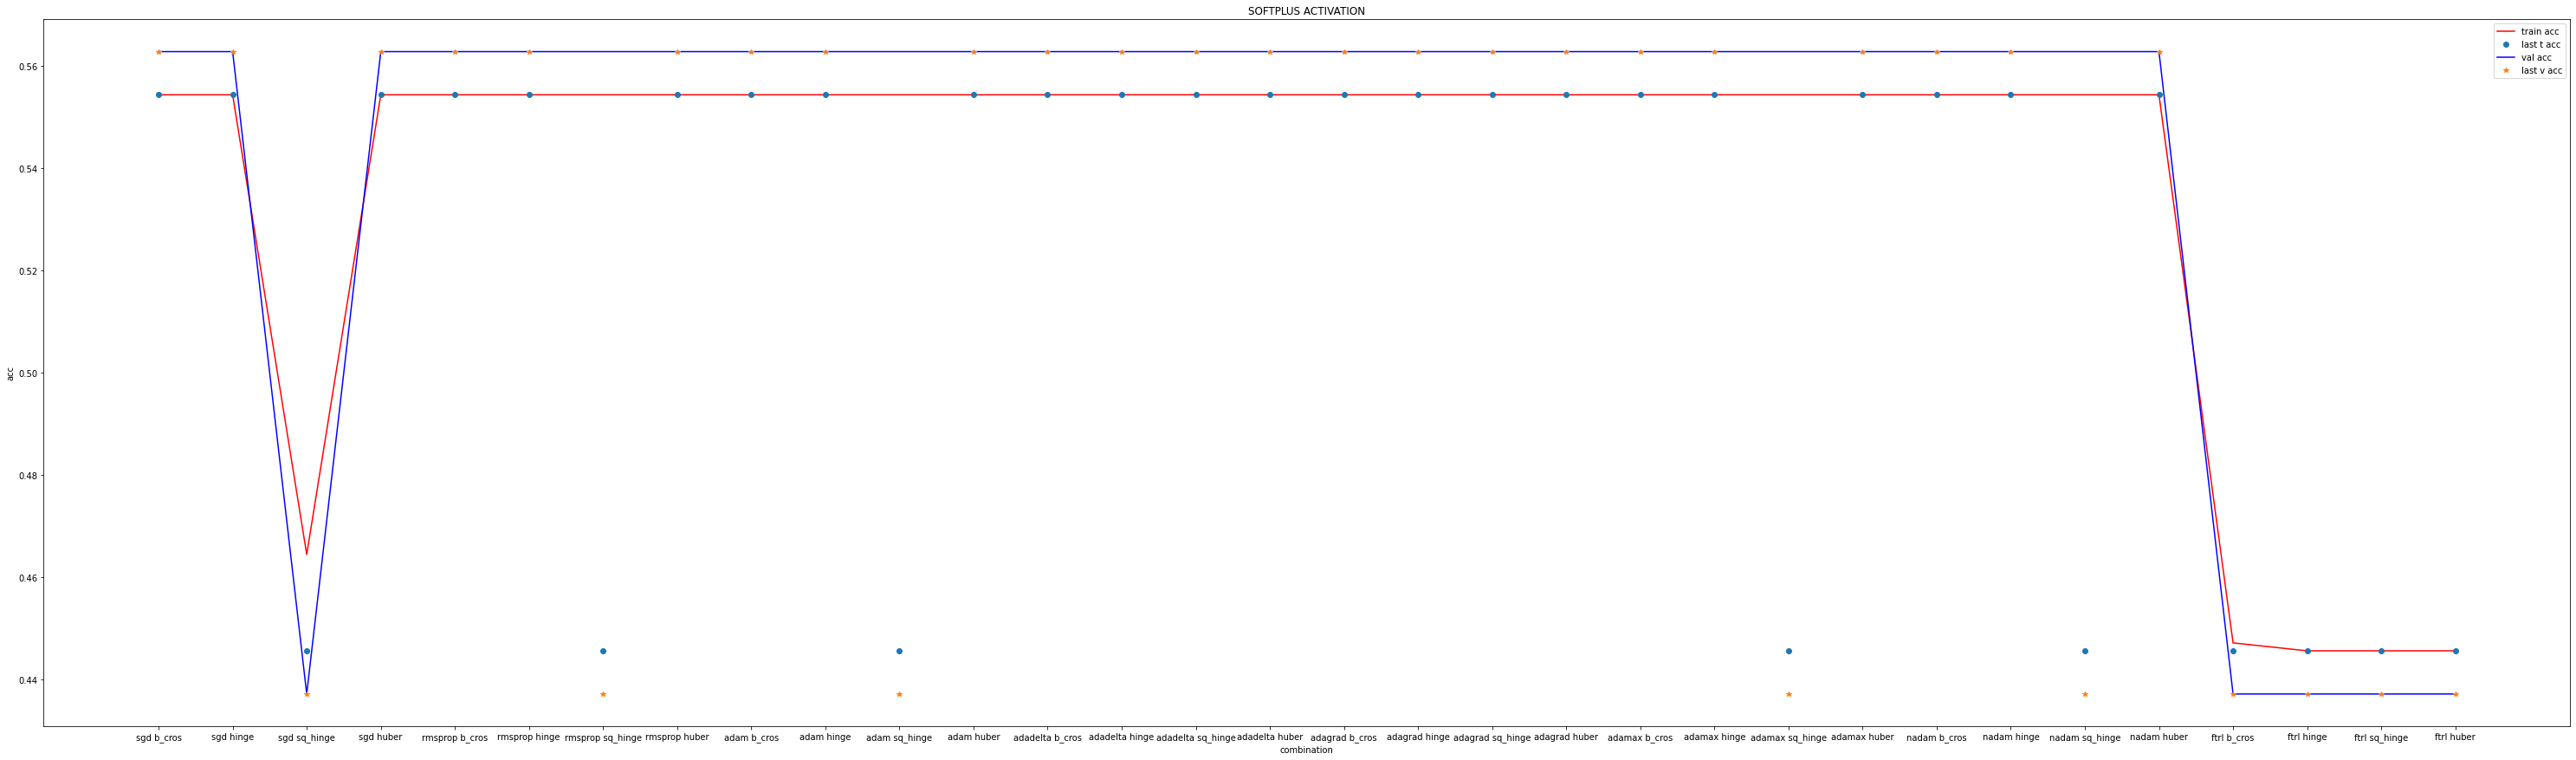

In [36]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(softplus_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(softplus_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(softplus_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(softplus_comb, last_accuracy_val, '*', label='last v acc')
plt.title('SOFTPLUS ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [37]:
softsign_comb = []

for opt in optimizers:
    for loss in binary:
        softsign_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softsign.shape[0]):
  best_accuracy_train.append(np.max(softsign[i]))
  last_accuracy_train.append(softsign[i,-1])
  best_accuracy_val.append(np.max(softsignv[i]))
  last_accuracy_val.append(softsignv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

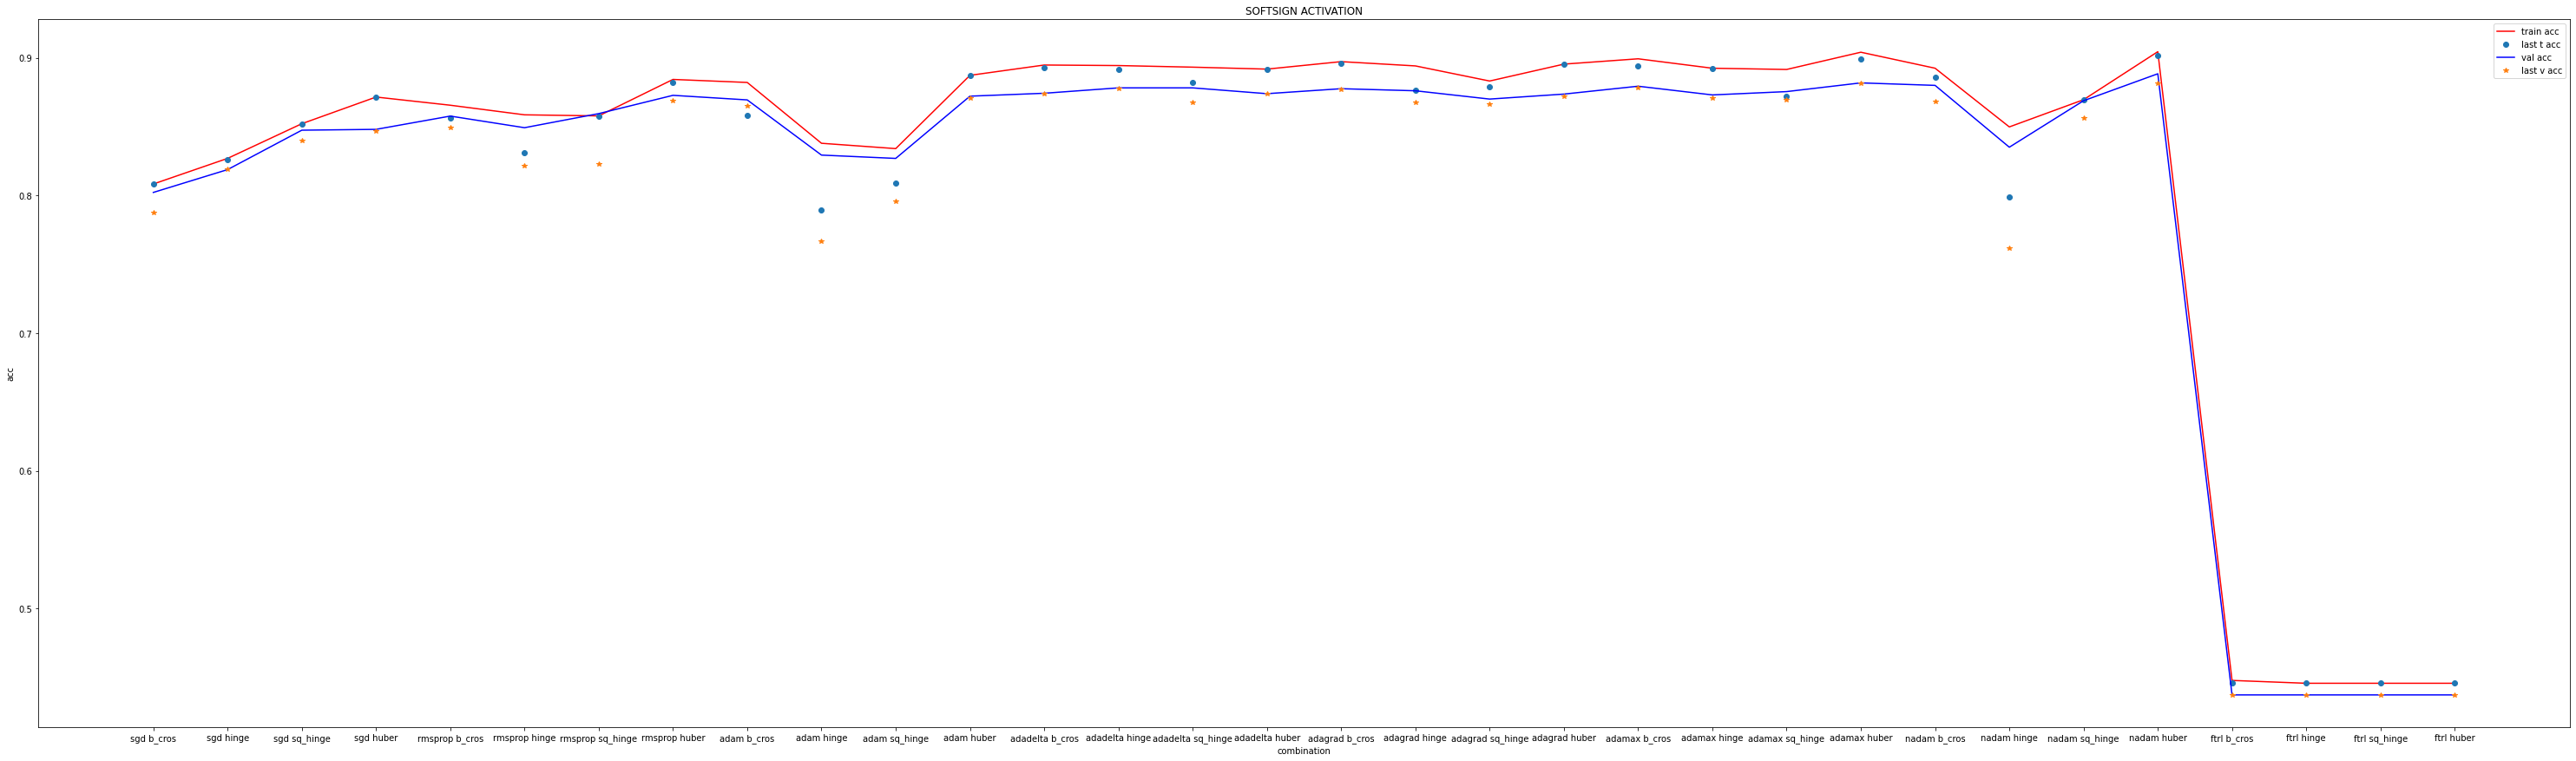

In [38]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(sigmoid_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(sigmoid_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(sigmoid_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(sigmoid_comb, last_accuracy_val, '*', label='last v acc')
plt.title('SOFTSIGN ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [39]:
selu_comb = []

for opt in optimizers:
    for loss in binary:
        selu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(selu.shape[0]):
  best_accuracy_train.append(np.max(selu[i]))
  last_accuracy_train.append(selu[i,-1])
  best_accuracy_val.append(np.max(seluv[i]))
  last_accuracy_val.append(seluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

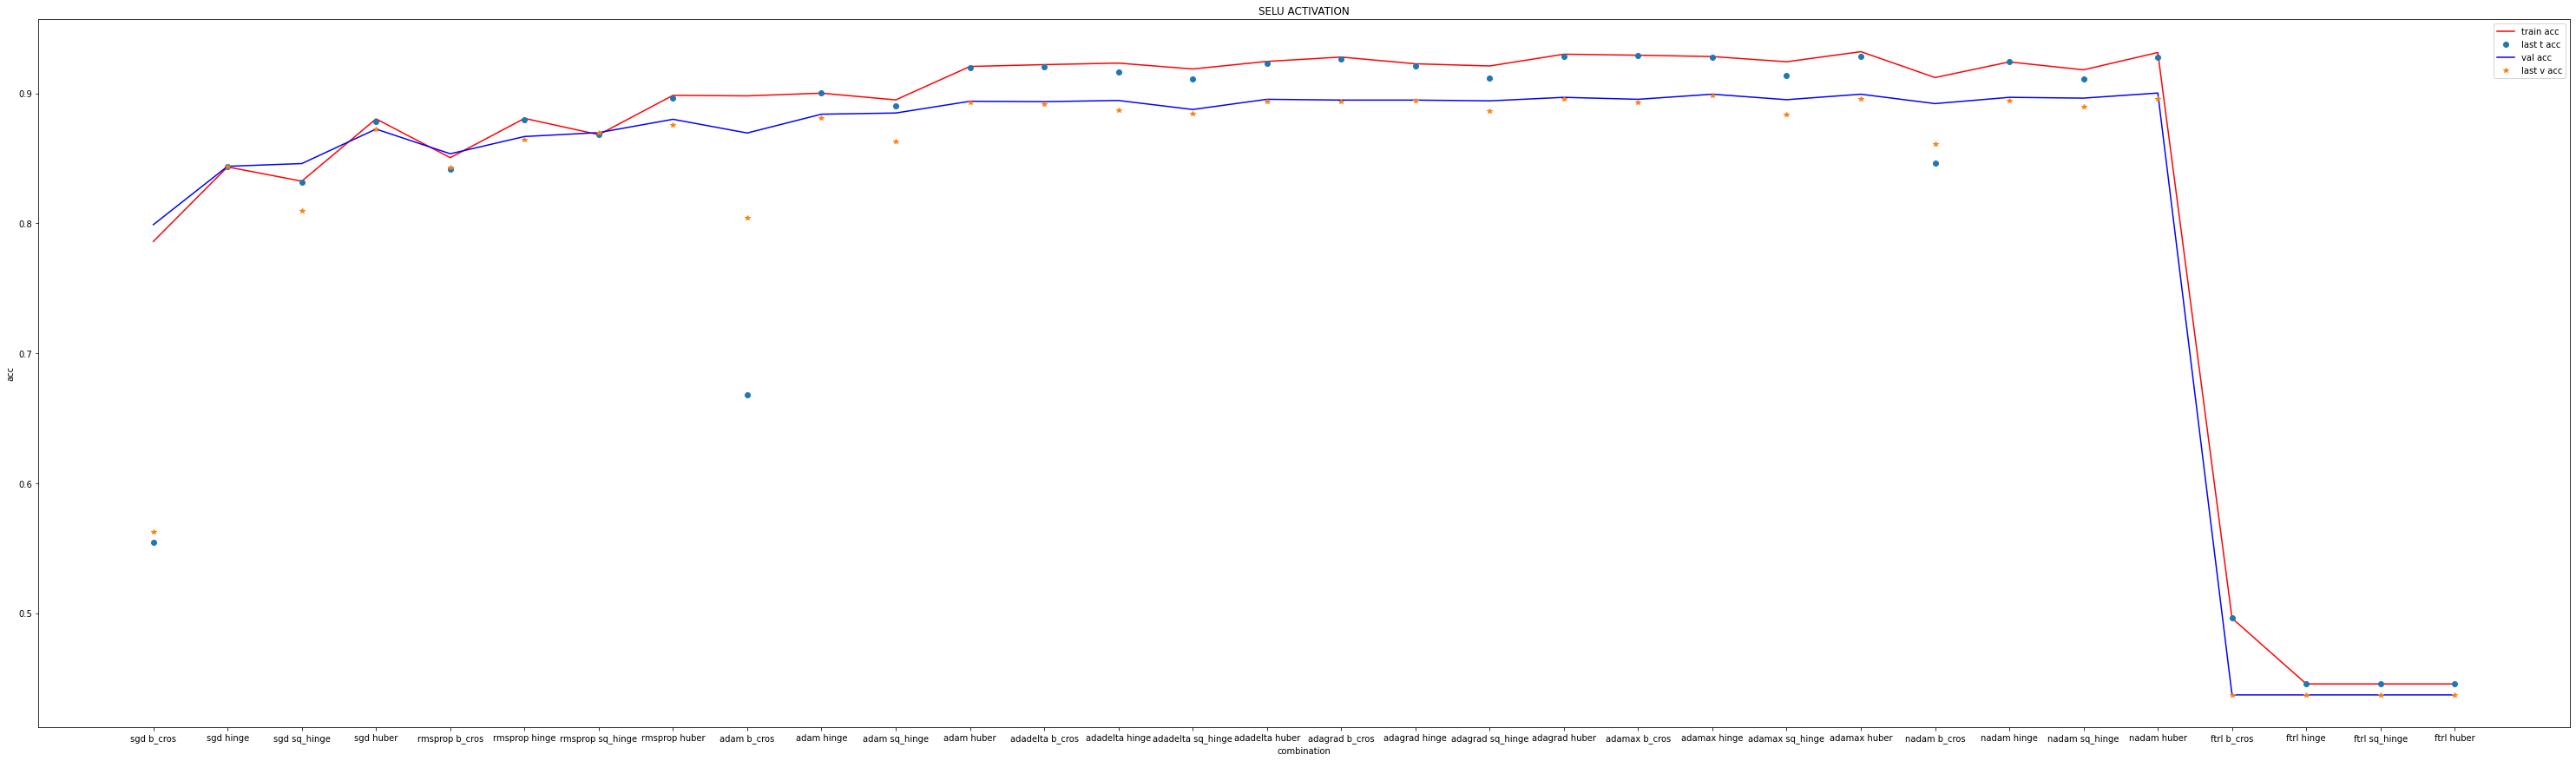

In [40]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(selu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(selu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(selu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(selu_comb, last_accuracy_val, '*', label='last v acc')
plt.title('SELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [41]:
elu_comb = []

for opt in optimizers:
    for loss in binary:
        elu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(elu.shape[0]):
  best_accuracy_train.append(np.max(elu[i]))
  last_accuracy_train.append(elu[i,-1])
  best_accuracy_val.append(np.max(eluv[i]))
  last_accuracy_val.append(eluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

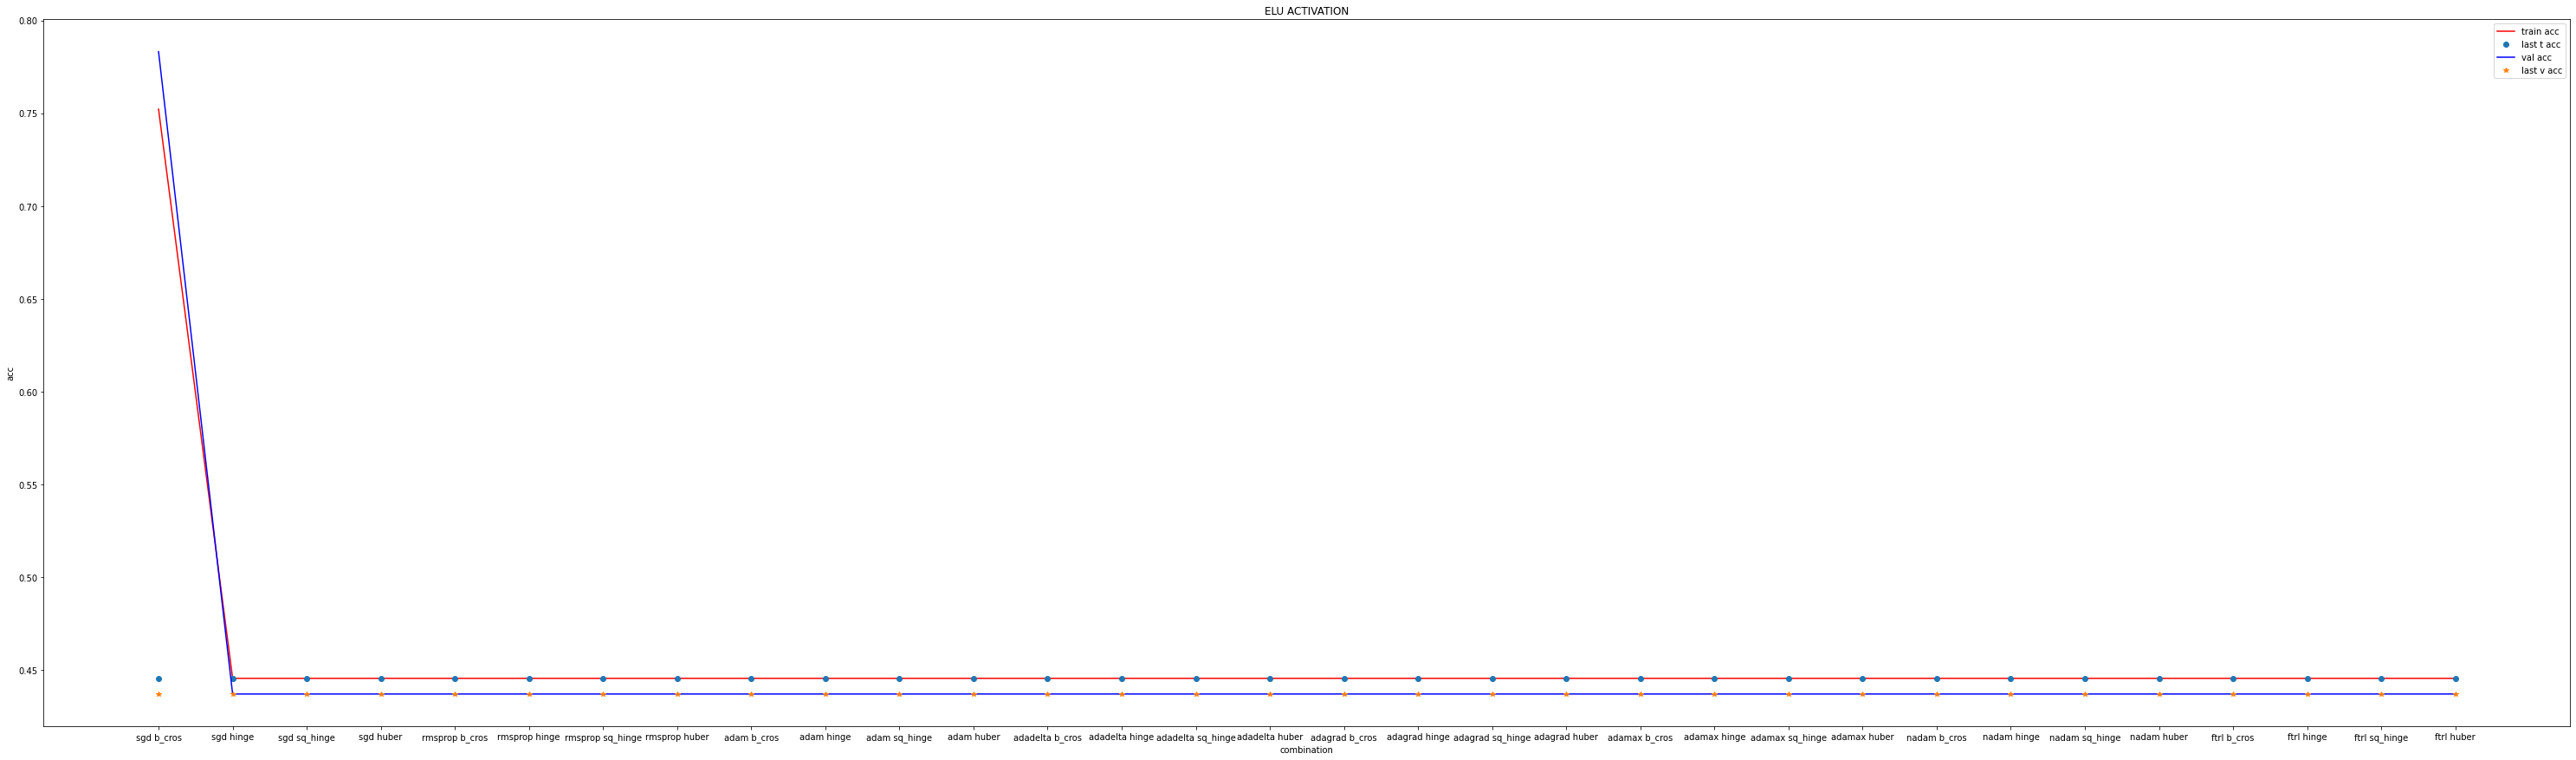

In [42]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(elu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(elu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(elu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(elu_comb, last_accuracy_val, '*', label='last v acc')
plt.title('ELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [43]:
exp_comb = []

for opt in optimizers:
    for loss in binary:
        exp_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(exp.shape[0]):
  best_accuracy_train.append(np.max(exp[i]))
  last_accuracy_train.append(exp[i,-1])
  best_accuracy_val.append(np.max(expv[i]))
  last_accuracy_val.append(expv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

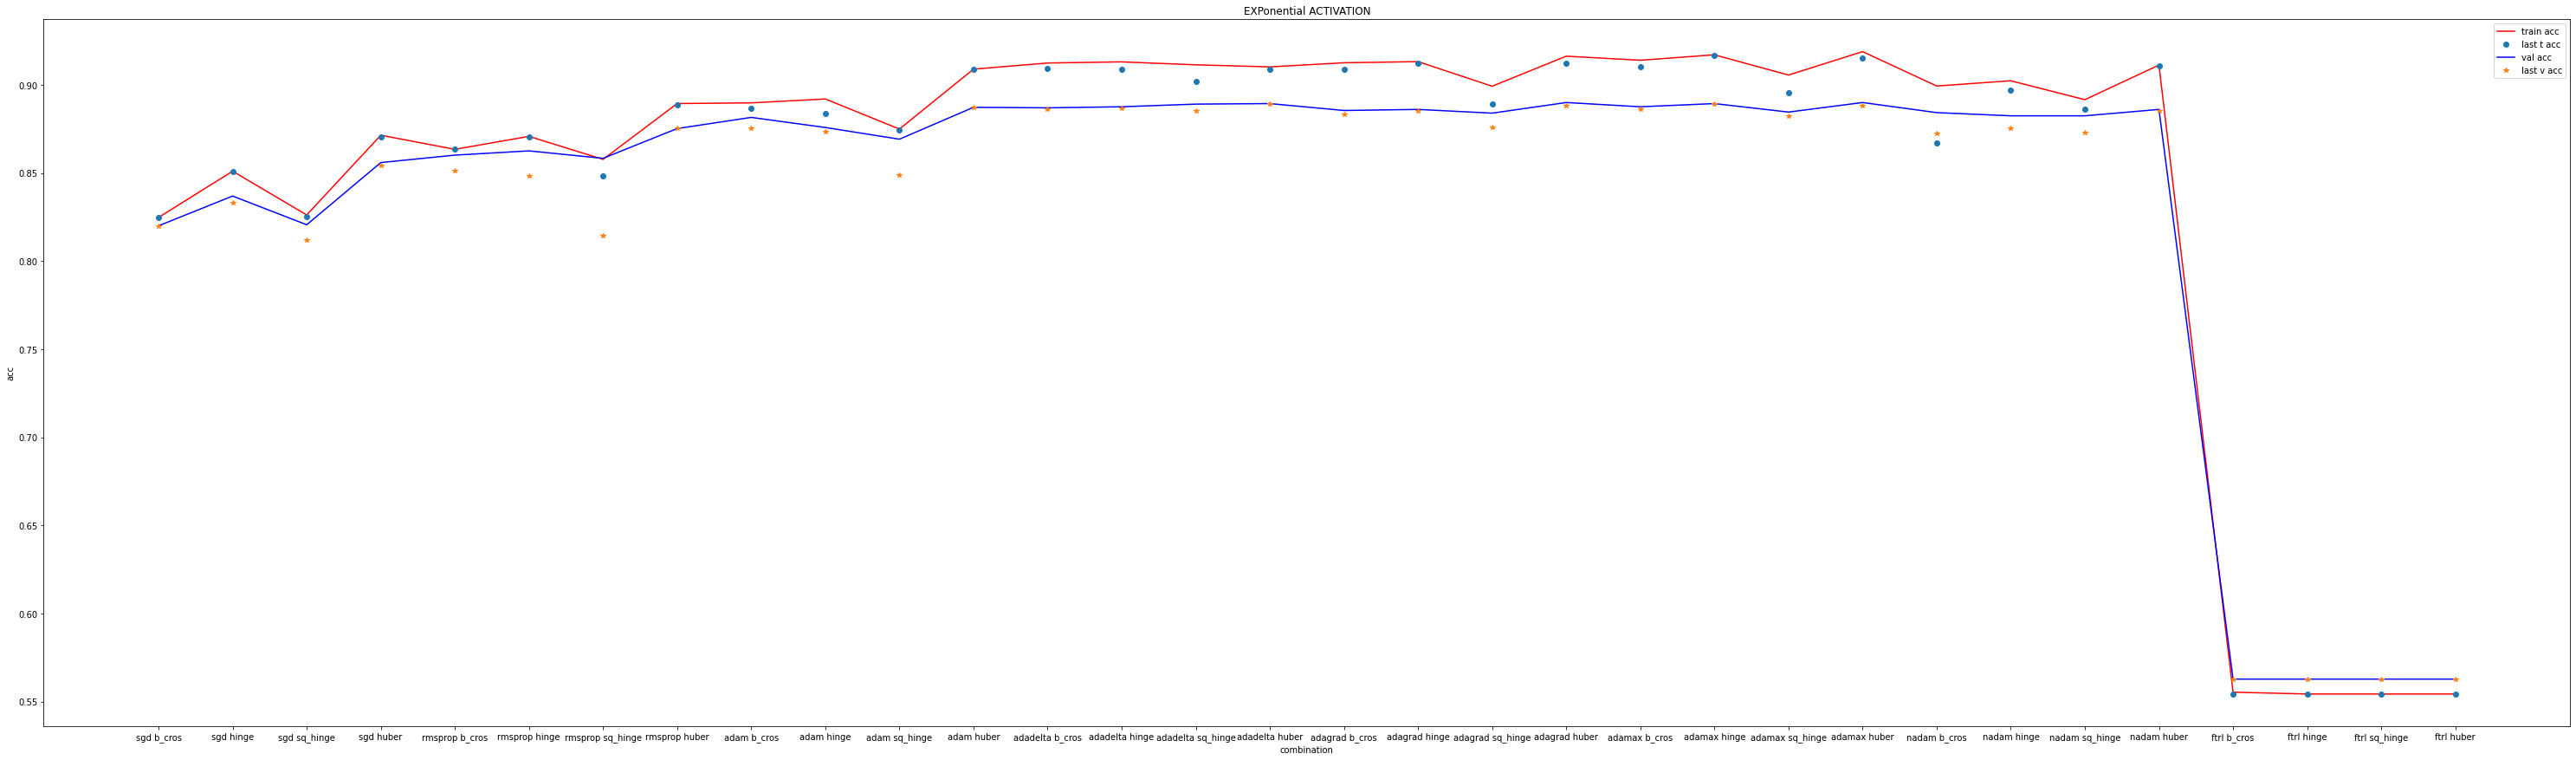

In [44]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(exp_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(exp_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(exp_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(exp_comb, last_accuracy_val, '*', label='last v acc')
plt.title('EXPonential ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [45]:
relu_comb = []

for opt in optimizers:
    for loss in binary:
        relu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(relu.shape[0]):
  best_accuracy_train.append(np.max(relu[i]))
  last_accuracy_train.append(relu[i,-1])
  best_accuracy_val.append(np.max(reluv[i]))
  last_accuracy_val.append(reluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

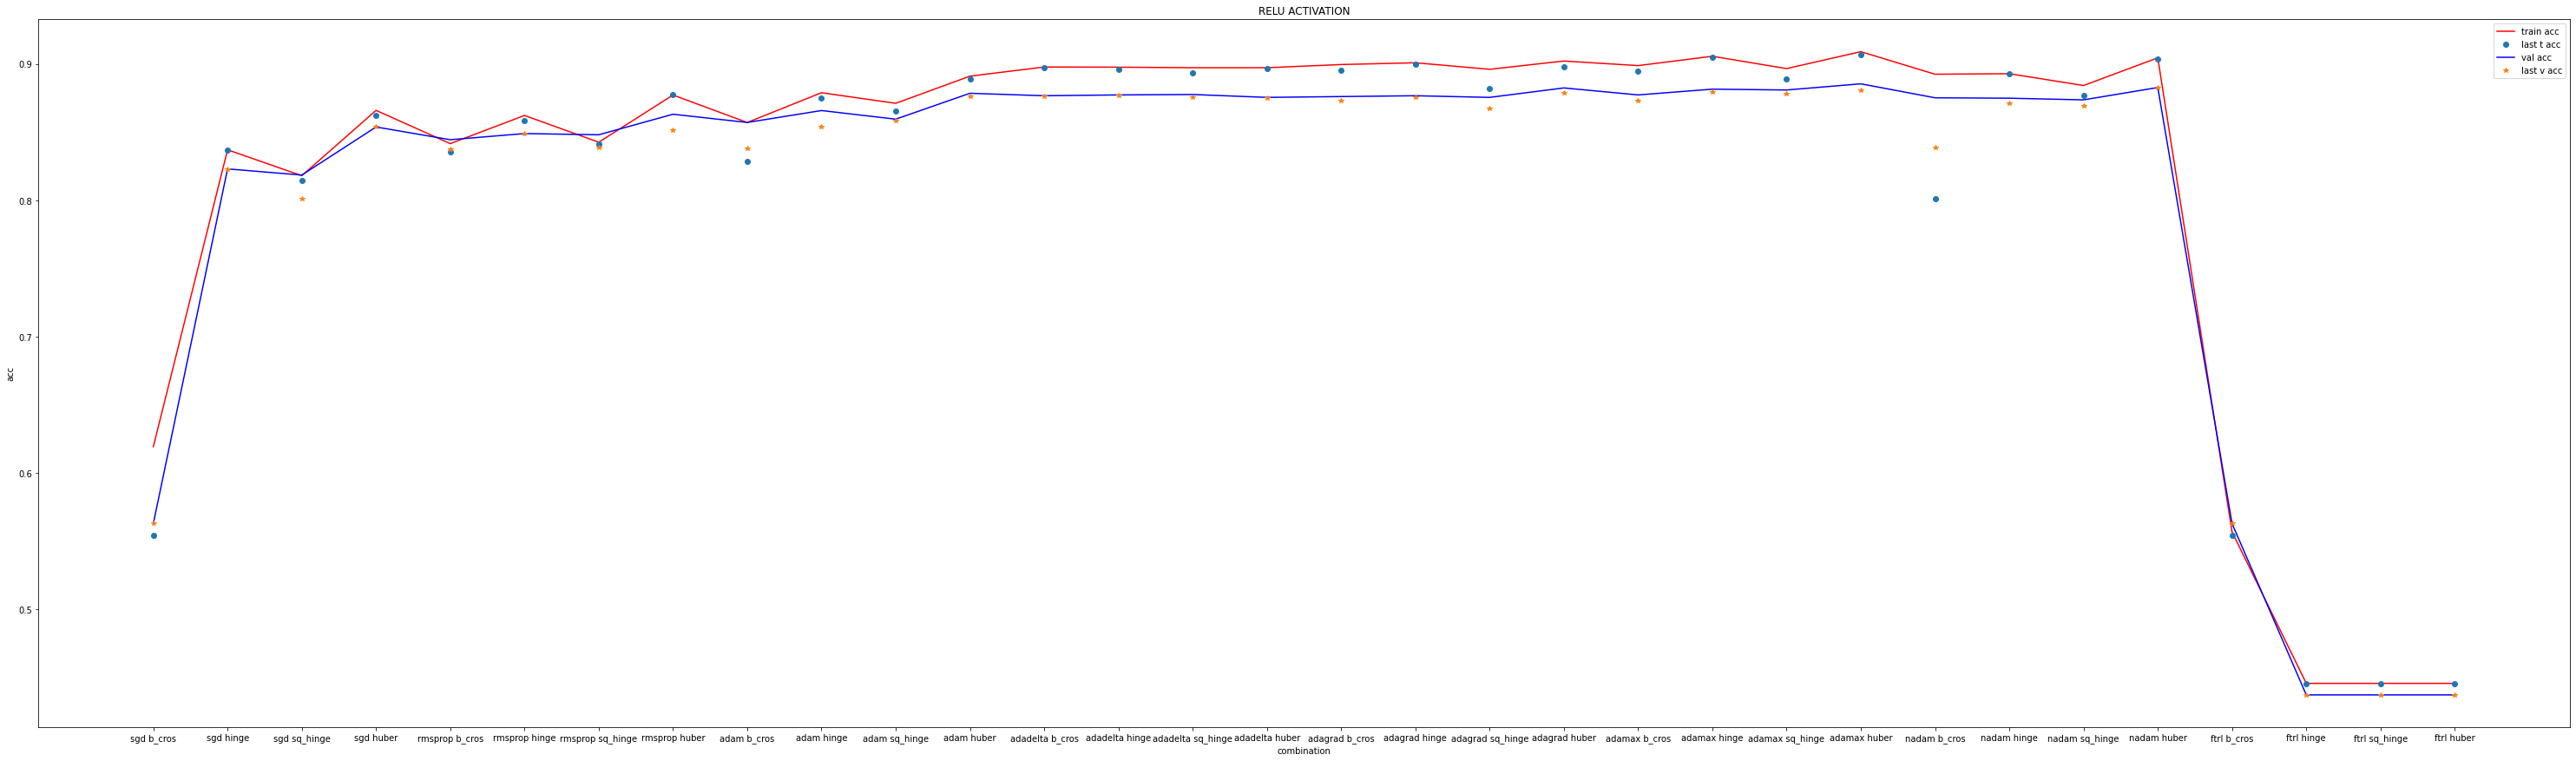

In [46]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(relu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(relu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(relu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(relu_comb, last_accuracy_val, '*', label='last v acc')
plt.title('RELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()